# Climate data Prades


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates

## Read data

DOY: day of the year.

T: Temperature [deg C].

RH: Relative humidity [-].

VPD: Vapour pressure deficit [kPa].

R: Radiation [W m-2].

WS: Wind speed [m s-1]. The firs years have mean wind speed while the last ones have maximum wind speed.

P: Precipitation [L m-2] or [mm].

In [4]:
files=glob.glob("*.xls")+glob.glob("*.xlsx")
files=np.sort(files); files=files[1:]

df=pd.concat((pd.read_excel(f) for f in files), ignore_index=True) # read and concate all year files.

df["datetime"]=df.apply(lambda x: pd.to_datetime(x["year"], format="%Y") # create the datetime column.
    + pd.DateOffset(days=x["DOY"] - 1, hours=x["time"]/100),
    axis=1,)

df.rename(columns={'temp (ºC)': 'Ta', 'humidity (%)': 'HR','VPD (Kpa)': 'VPD', 'Radiation (W m-2)': 'R','wind speed (m s-1)':'maxWS','mean wind speed (m s-1)': 'meanWS'
,'rainfall (L m-2)':'P'}, inplace=True)

df.loc[(df['HR']<0) | (df['HR']>100),'VPD']=np.nan
df.loc[(df['HR']<0) | (df['HR']>100),'HR']=np.nan # replace values of HR<0 or H>100 by NAN.   

In [6]:
df.to_csv('Prades_hourly.csv')

## Aggregate at daily resolution




In [7]:
df_daily=pd.DataFrame()
df_daily=df.resample('d',on='datetime').mean().dropna(how='all')
df_daily['Tmax']=df.resample('d',on='datetime').Ta.max().dropna(how='all')
df_daily['Tmin']=df.resample('d',on='datetime').Ta.min().dropna(how='all')
#df_daily['WSmin']=df.resample('d',on='datetime').maxWS.min().dropna(how='all')
#df_daily['WSmax']=df.resample('d',on='datetime').maxWS.max().dropna(how='all')
df_daily['P']=df.resample('d',on='datetime').P.sum().dropna(how='all')
df_daily['Datetime']=df.resample('d',on='datetime').datetime.mean().dropna(how='all').dt.date
df_daily['Datetime']= pd.to_datetime(df_daily['Datetime'])
df_daily=df_daily.drop('time',axis=1)
df_daily['DOY']=df_daily['Datetime'].dt.dayofyear

df_daily=df_daily.reindex(columns=['Datetime','year','DOY','Ta','Tmax','Tmin','HR','VPD','R','maxWS','P'])
df_daily.rename(columns={"maxWS":"WS"}, inplace = True)

df_daily

,Datetime,year,DOY,Ta,Tmax,Tmin,HR,VPD,R,WS,P
datetime,,,,,,,,,,,
1999-01-01,1999-01-01,1999.0,1,3.664261,4.377,2.368,100.000000,0.000000,13.858130,NaN,6.8
1999-01-02,1999-01-02,1999.0,2,3.489375,7.300,2.118,95.216667,0.041316,55.083542,NaN,0.0
1999-01-03,1999-01-03,1999.0,3,4.997667,8.190,2.839,83.039167,0.161932,109.156958,NaN,0.0
1999-01-04,1999-01-04,1999.0,4,8.441083,13.380,4.587,69.924583,0.363125,115.266458,NaN,0.0
1999-01-05,1999-01-05,1999.0,5,13.511667,19.480,10.710,30.110417,1.086189,122.989167,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2023-12-27,2023.0,361,10.256250,15.820,7.480,52.708333,NaN,NaN,NaN,0.0
2023-12-28,2023-12-28,2023.0,362,8.892500,13.140,6.460,59.166667,NaN,NaN,NaN,0.0
2023-12-29,2023-12-29,2023.0,363,8.448333,11.450,5.840,66.166667,NaN,NaN,NaN,0.0


In [8]:
df_daily.to_csv('Prades_daily.csv')

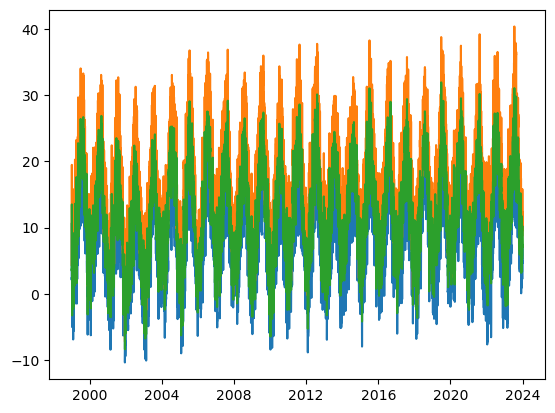

In [9]:
plt.plot(df_daily.Datetime,df_daily.Tmin,)
plt.plot(df_daily.Datetime,df_daily.Tmax)
plt.plot(df_daily.Datetime,df_daily.Ta)

## Aggregate at yearly resolution


In [10]:
df_yearly=pd.DataFrame()
df_yearly=df.resample('y',on='datetime').mean().dropna(how='all')
df_yearly['Tmax']=df.resample('y',on='datetime').Ta.max().dropna(how='all')
df_yearly['Tmax_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['Tmin']=df.resample('y',on='datetime').Ta.min().dropna(how='all')
df_yearly['Tmin_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['P']=df.resample('y',on='datetime').P.sum().dropna(how='all')
df_yearly['Ta_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['HR_sd']=df.resample('y',on='datetime').HR.std().dropna(how='all')
df_yearly['VPD_sd']=df.resample('y',on='datetime').VPD.std().dropna(how='all')
df_yearly['R_sd']=df.resample('y',on='datetime').R.std().dropna(how='all')
df_yearly['WS_sd']=df.resample('y',on='datetime').maxWS.std().dropna(how='all')
df_yearly['P_sd']=df.resample('y',on='datetime').P.std().dropna(how='all')
df_yearly['year']=df.resample('y',on='datetime').datetime.mean().dropna(how='all').dt.year
# df_yearly['Datetime']= pd.to_datetime(df_daily['Datetime'])
df_yearly=df_yearly.drop('time',axis=1)
df_yearly=df_yearly.drop('DOY',axis=1)
df_yearly=df_yearly.reindex(columns=['year','Ta','Tmax','Tmin','HR','VPD','R','maxWS','P','Ta_sd','Tmax_sd','Tmin_sd',
                           'HR_sd','VPD_sd','R_sd','WS_sd','P_sd'])

df_yearly.rename(columns={"maxWS":"WS"}, inplace = True)
df_yearly

df_yearly.to_csv('Prades_yearly.csv')

/tmp/ipykernel_23487/2422596028.py:2: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly=df.resample('y',on='datetime').mean().dropna(how='all')
/tmp/ipykernel_23487/2422596028.py:3: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly['Tmax']=df.resample('y',on='datetime').Ta.max().dropna(how='all')
/tmp/ipykernel_23487/2422596028.py:4: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly['Tmax_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
/tmp/ipykernel_23487/2422596028.py:5: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly['Tmin']=df.resample('y',on='datetime').Ta.min().dropna(how='all')
/tmp/ipykernel_23487/2422596028.py:6: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearl

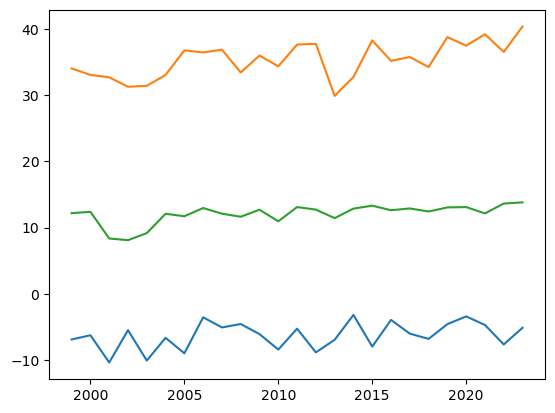

In [11]:
plt.plot(df_yearly.year,df_yearly.Tmin)
plt.plot(df_yearly.year,df_yearly.Tmax)
plt.plot(df_yearly.year,df_yearly.Ta)

## Means during the whole period

In [12]:
df_means=pd.DataFrame()
df_yearly=df.resample('y',on='datetime').mean().dropna(how='all')
df_yearly['Tmax']=df.resample('y',on='datetime').Ta.max().dropna(how='all')
df_yearly['Tmax_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['Tmin']=df.resample('y',on='datetime').Ta.min().dropna(how='all')
df_yearly['Tmin_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['P']=df.resample('y',on='datetime').P.sum().dropna(how='all')
df_yearly['Ta_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['HR_sd']=df.resample('y',on='datetime').HR.std().dropna(how='all')
df_yearly['VPD_sd']=df.resample('y',on='datetime').VPD.std().dropna(how='all')
df_yearly['R_sd']=df.resample('y',on='datetime').R.std().dropna(how='all')
df_yearly['WS_sd']=df.resample('y',on='datetime').maxWS.std().dropna(how='all')
df_yearly['P_sd']=df.resample('y',on='datetime').P.std().dropna(how='all')
df_yearly['year']=df.resample('y',on='datetime').datetime.mean().dropna(how='all').dt.year
# df_yearly['Datetime']= pd.to_datetime(df_daily['Datetime'])
df_yearly=df_yearly.drop('time',axis=1)
df_yearly=df_yearly.drop('DOY',axis=1)
df_yearly=df_yearly.reindex(columns=['year','Ta','Tmax','Tmin','HR','VPD','R','maxWS','P','Ta_sd','Tmax_sd','Tmin_sd',
                           'HR_sd','VPD_sd','R_sd','WS_sd','P_sd'])

df_yearly.rename(columns={"maxWS":"WS"}, inplace = True)
df_yearly

df_yearly.to_csv('Prades_yearly.csv')

/tmp/ipykernel_23487/2479874108.py:2: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly=df.resample('y',on='datetime').mean().dropna(how='all')
/tmp/ipykernel_23487/2479874108.py:3: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly['Tmax']=df.resample('y',on='datetime').Ta.max().dropna(how='all')
/tmp/ipykernel_23487/2479874108.py:4: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly['Tmax_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
/tmp/ipykernel_23487/2479874108.py:5: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly['Tmin']=df.resample('y',on='datetime').Ta.min().dropna(how='all')
/tmp/ipykernel_23487/2479874108.py:6: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearl

In [13]:
aa=df_daily.mean(axis=0) 

In [14]:
aa

Datetime    2011-07-02 00:00:00
year                2010.999243
DOY                   183.12025
Ta                    12.067382
Tmax                  17.280455
Tmin                   7.949731
HR                     74.77741
VPD                     0.48414
R                    179.764109
WS                      8.52108
P                      1.476767
dtype: object